# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Chapter-5" data-toc-modified-id="Chapter-5-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chapter 5</a></div><div class="lev2 toc-item"><a href="#5E1." data-toc-modified-id="5E1.-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>5E1.</a></div><div class="lev3 toc-item"><a href="#Ans" data-toc-modified-id="Ans-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Ans</a></div><div class="lev2 toc-item"><a href="#5E2." data-toc-modified-id="5E2.-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>5E2.</a></div><div class="lev3 toc-item"><a href="#Ans" data-toc-modified-id="Ans-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Ans</a></div><div class="lev2 toc-item"><a href="#5E3" data-toc-modified-id="5E3-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>5E3</a></div><div class="lev3 toc-item"><a href="#Ans" data-toc-modified-id="Ans-131"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Ans</a></div><div class="lev2 toc-item"><a href="#5E4" data-toc-modified-id="5E4-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>5E4</a></div><div class="lev3 toc-item"><a href="#Ans" data-toc-modified-id="Ans-141"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Ans</a></div><div class="lev2 toc-item"><a href="#5M1" data-toc-modified-id="5M1-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>5M1</a></div><div class="lev3 toc-item"><a href="#Ans" data-toc-modified-id="Ans-151"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Ans</a></div><div class="lev4 toc-item"><a href="#Spurious-correlated-data,-by-itself,-contains-a-lot-of-information-about-our-variable-of-interest" data-toc-modified-id="Spurious-correlated-data,-by-itself,-contains-a-lot-of-information-about-our-variable-of-interest-1511"><span class="toc-item-num">1.5.1.1&nbsp;&nbsp;</span>Spurious correlated data, by itself, contains a lot of information about our variable of interest</a></div><div class="lev4 toc-item"><a href="#When-the-cause-is-included,-the-effect-of-the-spurious-data-on-our-dependent-variable-shrinks;-the-cause-overtakes-the-spurious-association-in-terms-of-effect-size." data-toc-modified-id="When-the-cause-is-included,-the-effect-of-the-spurious-data-on-our-dependent-variable-shrinks;-the-cause-overtakes-the-spurious-association-in-terms-of-effect-size.-1512"><span class="toc-item-num">1.5.1.2&nbsp;&nbsp;</span>When the cause is included, the effect of the spurious data on our dependent variable shrinks; the cause overtakes the spurious association in terms of effect size.</a></div><div class="lev2 toc-item"><a href="#5M2." data-toc-modified-id="5M2.-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>5M2.</a></div><div class="lev3 toc-item"><a href="#Ans" data-toc-modified-id="Ans-161"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Ans</a></div><div class="lev4 toc-item"><a href="#generate-some-data" data-toc-modified-id="generate-some-data-1611"><span class="toc-item-num">1.6.1.1&nbsp;&nbsp;</span>generate some data</a></div><div class="lev2 toc-item"><a href="#5M3" data-toc-modified-id="5M3-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>5M3</a></div><div class="lev3 toc-item"><a href="#Ans" data-toc-modified-id="Ans-171"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Ans</a></div><div class="lev2 toc-item"><a href="#5M4" data-toc-modified-id="5M4-18"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>5M4</a></div><div class="lev3 toc-item"><a href="#Ans" data-toc-modified-id="Ans-181"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>Ans</a></div><div class="lev2 toc-item"><a href="#5M5" data-toc-modified-id="5M5-19"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>5M5</a></div><div class="lev3 toc-item"><a href="#5M5" data-toc-modified-id="5M5-191"><span class="toc-item-num">1.9.1&nbsp;&nbsp;</span>5M5</a></div><div class="lev2 toc-item"><a href="#Hard" data-toc-modified-id="Hard-110"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Hard</a></div><div class="lev2 toc-item"><a href="#5H1" data-toc-modified-id="5H1-111"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>5H1</a></div><div class="lev3 toc-item"><a href="#Ans" data-toc-modified-id="Ans-1111"><span class="toc-item-num">1.11.1&nbsp;&nbsp;</span>Ans</a></div><div class="lev2 toc-item"><a href="#5H2" data-toc-modified-id="5H2-112"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>5H2</a></div><div class="lev2 toc-item"><a href="#5H3" data-toc-modified-id="5H3-113"><span class="toc-item-num">1.13&nbsp;&nbsp;</span>5H3</a></div>

In [1]:
import pandas as pd
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs
import re

%matplotlib inline

# Chapter 5

## 5E1. 

Which of the linear models below are multiple linear regressions?

(1) $\mu_i = \alpha + \beta x_i$

(2) $\mu_i = \beta_x x_i + \beta_z x_z$

(3) $\mu_i = \alpha + \beta(x_i-z_i)$

(4) $\mu_i = \alpha + \beta_x x_i + \beta_z z_i$

### Ans

(1) is univariate since it's only using one variable $x_i$.

(2) is multivariate because it's using $x_i$ and $x_z$.

(3) is weird in that it's using two predictor variables $x_i$ and $z_i$ but there's only one beta coefficient. This is probably a case of negative multicollinearity between the two predictor variables (i.e. $x_i$ and $z_i$ are strongly negatively correlated: so if $x_i$ is high, then $z_i$ is low, vice versa). Including $z_i$ after we've included $x_i$ does not give us new information, so even though it's technically using two variables, we're really only estimating one, so I think this could be argued as if it's univariate regression.

(4) is definitely a multiple linear regression.

## 5E2. 

Write down a multiple regression to evaluate the claim: _Animal diversity is linearly related to latitude, but only after controlling for plant diversity_. You just need to write down the model definition.

### Ans

$$
\begin{equation}
\begin{aligned}
a_i &\sim \alpha + \beta_l l_i + \beta_p p_i + \beta_{lp} l_i p_i \\
a_i &\sim \alpha + \beta_p p_i + \beta_{lp} l_i p_i & \text{latitude by itself has no effect}
\end{aligned}
\end{equation}
$$

## 5E3

Write down a multiple regression to evaluate the claim: _Neither amount of funding nor size of laboratory is by itself a good predictor of time to PhD degree; but together these variables are both positively associated with time to degree._ Write down the model definition and indicate which side of zero each slope parameter should be on.

### Ans

$$
\begin{equation}
\begin{aligned}
    t_i &\sim \alpha + \beta_s s_i + \beta_f f_i
\end{aligned}
\end{equation}
$$

Since we think that they are both positively correlated with time to degree when accounting for both, we expect that $\beta_s$ and $\beta_f$ are above 0.

## 5E4

Suppose you have a single categorical predictor with 4 levels (unique values), labeled A, B, C, and D. Let $A_i$ be an indicator variable that is 1 where case $i$ is in category $A$. Also suppose $B_i$, $C_i$, and $D_i$ for the other categories. Now which of the following linear models are inferentially equivalent ways to include the categorical variable in a regression? Models are inferentially equivalent when it's possible to compute one posterior distribution from the posterior distribution of another model.

(1) $ \mu_i = \alpha + \beta_A A_i + \beta_B B_i + \beta_D D_i$

(2) $ \mu_i = \alpha + \beta_A A_i + \beta_B B_i + \beta_C C_i+ \beta_D D_i$

(3) $ \mu_i = \alpha + \beta_B B_i + \beta_C C_i+ \beta_D D_i$

(4) $ \mu_i = \alpha_A A_i + \alpha + \alpha_B B_i + \alpha_C C_i+ \alpha_D D $

(5) $ \mu_i = \alpha_A(1-B_i-C_i-D_i) + \alpha_B B_i + \alpha_C C_i + \alpha_D D_i$


### Ans

(1) $\alpha$ is the value of $C_i$ when $C_i$ is true. This is good.

(2) Adding $\beta_C C_i$ to (1) makes $\alpha$ redundant, so this is not inferentially equivalent.

(3) $\alpha$ is the value of $\mu_i$ when $A_i$ is true. This is inferentially equivalent to (1).

(4) is similar to (2), so not inferentially equivalent.

(5) no double-counting happens, so this is also inferentially equivalent.

## 5M1

Invent your own example of a spurious correlation. An outcome variable should be correlated with both predictor variables. But when both predictors are entered in the same model, the correlation between the outcome and one of the predictors should mostly vanish (or at least be greatly reduced).

### Ans

$$
\begin{equation}
\begin{aligned}
    \text{cause} &\sim \text{Normal}(0,5) \\
    \text{spurious} &\sim \text{Normal}(\text{cause}, 3) \\
    c &\sim \text{Normal}(\text{cause}, 1) \\
\end{aligned}
\end{equation}
$$


In [2]:
cause_pred = np.random.normal(0, 5, 10000)
spurious_pred = np.random.normal(cause_pred, np.ones(10000) * 3)
c = np.random.normal(cause_pred, np.ones(10000))

In [3]:
with pm.Model() as spurious_5m1:
    beta_spurious = pm.Normal('beta_spurious', 0, 20)
    reg = beta_spurious * spurious_pred
    obs_c = pm.Normal('obs_c', reg, 6, observed=c)
    
    trace_spurious_5m1 = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 10500/10500 [00:05<00:00, 1853.48it/s]


#### Spurious correlated data, by itself, contains a lot of information about our variable of interest

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c16d790b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c1a345978>]], dtype=object)

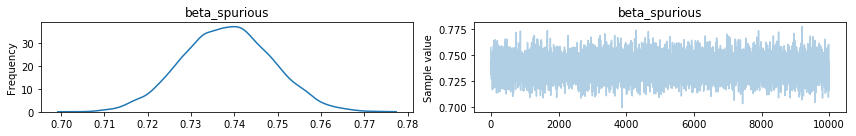

In [4]:
pm.traceplot(trace_spurious_5m1)

In [5]:
with pm.Model() as spurious_w_cause_5m1:
    beta_spurious = pm.Normal('beta_spurious', 0, 20)
    beta_cause = pm.Normal('beta_cause', 0, 10)
    reg = beta_spurious * spurious_pred + \
        beta_cause * cause_pred
    obs_c = pm.Normal('obs_c', reg, 6, observed=c)
    
    trace_spurious_w_cause_5m1 = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 10500/10500 [00:12<00:00, 871.07it/s]


#### When the cause is included, the effect of the spurious data on our dependent variable shrinks; the cause overtakes the spurious association in terms of effect size.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1adeff28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c1af34a20>]], dtype=object)

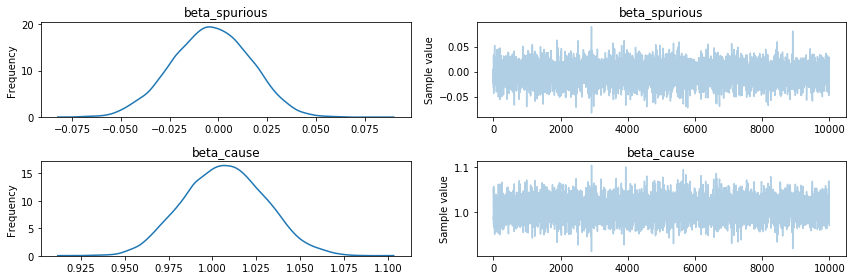

In [6]:
pm.traceplot(trace_spurious_w_cause_5m1)

## 5M2. 
Invent your own example of a masked relationship. An outcome variable should be correlated with both predictor variables, but in opposite directions. And the two predictor variables should be correlated with one another.

### Ans

$$
\begin{equation}
\begin{aligned}
    a &\sim \text{Normal}(0,5) \\
    b &\sim \text{Normal}(a, 3) \\
    c &\sim \text{Normal}(3 + a, 10) \\
    d &\sim \text{Normal}(b-c, 5)
\end{aligned}
\end{equation}
$$


#### generate some data

In [7]:
vars_5m2 = {
    'a': np.random.normal(0,5,10000)
}

vars_5m2['b'] = np.random.normal(
    vars_5m2['a'], np.ones(10000) * 3
)

vars_5m2['c'] = np.random.normal(
    np.ones(10000)*3 + vars_5m2['a'], 10
)

vars_5m2['d'] = np.random.normal(
    vars_5m2['b'] - vars_5m2['c'], np.ones(10000) * 5
)

In [8]:
with pm.Model() as model_only_b_5m2:
    a = pm.Normal('a', 10,5)
    b = pm.Normal('b', a, 3)
    d = pm.Normal('d', b, 5, 
                  observed=vars_5m2['d'])
    
    model_only_b_5m2_trace = pm.sample(5000)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
 98%|█████████▊| 5370/5500 [00:04<00:00, 1263.18it/s]/Users/eddericugaddan/anaconda3/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.890411581135, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
100%|██████████| 5500/5500 [00:04<00:00, 1269.02it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1ab02630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c1b5a8c50>]], dtype=object)

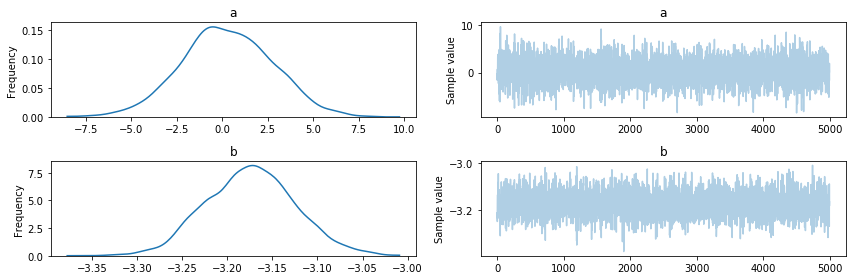

In [9]:
pm.traceplot(model_only_b_5m2_trace)

In [10]:
with pm.Model() as model_only_c_5m2:
    a = pm.Normal('a', 10,5)
    c = pm.Normal('c', 3 + a, 10)
    d = pm.Normal('d', -c, 5, 
                  observed=vars_5m2['d'])
    
    model_only_c_5m2_trace = pm.sample(5000)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
 99%|█████████▊| 5423/5500 [00:04<00:00, 1213.56it/s]/Users/eddericugaddan/anaconda3/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.883565861368, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
100%|██████████| 5500/5500 [00:04<00:00, 1217.08it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1ad7be80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c164f3748>]], dtype=object)

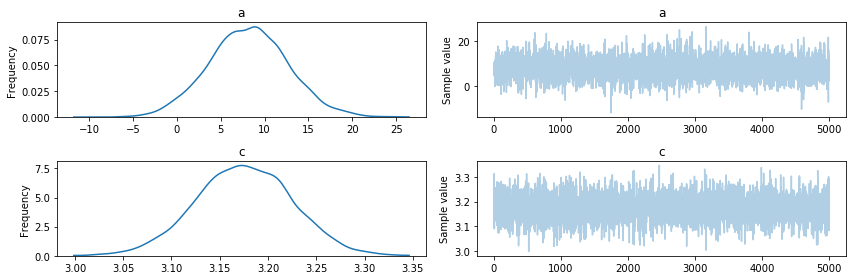

In [11]:
pm.traceplot(model_only_c_5m2_trace)

In [12]:
with pm.Model() as model_full_5m2:
    a = pm.Normal('a', 10,5)
    b = pm.Normal('b', a, 3)
    c = pm.Normal('c', 3 + a, 10)
    d = pm.Normal('d', b-c, 5, 
                  observed=vars_5m2['d'])
    
    model_full_5m2_trace = pm.sample(5000)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 5500/5500 [03:06<00:00, 29.43it/s]/Users/eddericugaddan/anaconda3/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:459: UserWarning: Chain 0 reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
  'reparameterize.' % self._chain_id)



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1c33b320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c1c49cfd0>]], dtype=object)

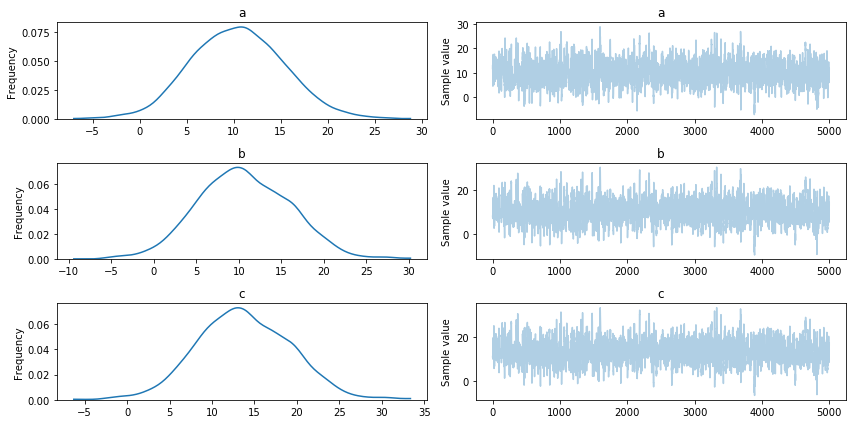

In [13]:
pm.traceplot(model_full_5m2_trace)

## 5M3

It is sometimes observed that the best predictor of fire risk is the presence of firefighters--States and localities with many firefighters also have more fires. Presumably firefighters do not _cause_ fires. Nevertheless, this is not a spurious correlation. Instead fires cause firefighters. Consider the same reversal of causal inference in the context of the divorce and marriage data. How might a high divorce rate cause a higher marriage rate? Can you think of a way to evaluate this relationship, using multiple regression?

### Ans

Higher divorce rates might "cause" higher marriage rates by increasing the pool of people who could get married

Higher divorce rates are caused by higher marriage rates -- the more married people there are, the more people that could get divorced.

When factoring only marriage rate as a predictor of divorce rate, we should effect that the beta-term for marriage rate would be high. However, when we factor in median age of marriage, we should expect that it would shrink the contribution (i.e. move closer to 0) of divorce rate on predicting marriage rate. Lower ages of marriage are probably the cause to higher divorce rates and higher rates of marriage.

## 5M4

In the divorce data, States with high numbers of Mormons (members of The Church of Jesus christ Latter-day Saints, LDS) have much lower divorce rates than the regression models expected. Find a list of LDS population by State and use those numbers as a predictor variable, predicting divorce rate using marriage rate, median age at marriage, and percent LDS population (possibly standardized). You may want to consider transformation of the raw percent LDS variable.

### Ans

In [14]:
import urllib.request
url = "https://en.wikipedia.org/wiki/The_Church_of_Jesus_Christ_of_Latter-day_Saints_membership_statistics_(United_States)"
request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
html = response.read().decode('utf-8')

soup = bs(html, 'html.parser')

In [15]:
lds_tables_html = soup.find_all('table', attrs={'class': ['wikitable', 'sortable', 'jquery-tablesorter']})[0]
lds_tables_html

<table class="wikitable sortable" style="text-align: right">
<tr>
<th>State</th>
<th>Membership</th>
<th>Population</th>
<th>LDS</th>
<th><a href="/wiki/Temple_(LDS_Church)" title="Temple (LDS Church)">Temples</a></th>
<th><a href="/wiki/Mission_(LDS_Church)" title="Mission (LDS Church)">Missions</a></th>
<th><a href="/wiki/Stake_(Latter_Day_Saints)" title="Stake (Latter Day Saints)">Stakes</a></th>
<th><a href="/wiki/District_(LDS_Church)" title="District (LDS Church)">Districts</a></th>
<th><a href="/wiki/Ward_(LDS_Church)" title="Ward (LDS Church)">Wards</a></th>
<th><a href="/wiki/Ward_(LDS_Church)#Branch" title="Ward (LDS Church)">Branches</a></th>
<th><a href="/wiki/Ward_(LDS_Church)#Wards_and_branches" title="Ward (LDS Church)">Congregations</a></th>
<th><a href="/wiki/Family_History_Center_(LDS_Church)" title="Family History Center (LDS Church)">Family History Centers</a></th>
</tr>
<tr>
<td align="left"><a href="/wiki/The_Church_of_Jesus_Christ_of_Latter-day_Saints_in_Alabama"

In [16]:
m = re.split(r'\n',lds_tables_html.text); m

['',
 '',
 'State',
 'Membership',
 'Population',
 'LDS',
 'Temples',
 'Missions',
 'Stakes',
 'Districts',
 'Wards',
 'Branches',
 'Congregations',
 'Family History Centers',
 '',
 '',
 'Alabama',
 '37,237',
 '4,863,300',
 '0.77%',
 '1',
 '1',
 '7',
 '0',
 '45',
 '30',
 '75',
 '44',
 '',
 '',
 'Alaska',
 '33,810',
 '741,894',
 '4.56%',
 '1',
 '1',
 '8',
 '0',
 '60',
 '23',
 '83',
 '15',
 '',
 '',
 'Arizona',
 '423,056',
 '6,931,071',
 '6.10%',
 '6',
 '6',
 '112',
 '0',
 '809',
 '87',
 '896',
 '74',
 '',
 '',
 'Arkansas',
 '30,694',
 '2,988,248',
 '1.03%',
 '0',
 '2',
 '7',
 '0',
 '42',
 '27',
 '69',
 '25',
 '',
 '',
 'California',
 '771,464',
 '39,250,017',
 '1.97%',
 '7',
 '20',
 '155',
 '0',
 '1,164',
 '144',
 '1,308',
 '226',
 '',
 '',
 'Colorado',
 '151,884',
 '5,540,545',
 '2.74%',
 '2',
 '4',
 '35',
 '0',
 '278',
 '29',
 '307',
 '64',
 '',
 '',
 'Connecticut',
 '15,834',
 '3,576,452',
 '0.44%',
 '1',
 '0',
 '3',
 '0',
 '29',
 '4',
 '33',
 '10',
 '',
 '',
 'Delaware',
 '5,400',
 

In [17]:
len(m)

744

In [18]:
lds_membership_wikipedia = pd.DataFrame({
    'State': [m[i] for i in range(16,730,14)],
    'lds-membership': [m[i] for i in range(19,730,14)]
}); lds_membership_wikipedia

,State,lds-membership
0,Alabama,0.77%
1,Alaska,4.56%
2,Arizona,6.10%
3,Arkansas,1.03%
4,California,1.97%
5,Colorado,2.74%
6,Connecticut,0.44%
7,Delaware,0.57%
8,District of Columbia,0.40%
9,Florida,0.75%


In [19]:
lds_membership_wikipedia['lds_memb_perc_float'] = \
    lds_membership_wikipedia['lds-membership'].str.strip('%').astype('float')
    
lds_membership_wikipedia

,State,lds-membership,lds_memb_perc_float
0,Alabama,0.77%,0.77
1,Alaska,4.56%,4.56
2,Arizona,6.10%,6.10
3,Arkansas,1.03%,1.03
4,California,1.97%,1.97
5,Colorado,2.74%,2.74
6,Connecticut,0.44%,0.44
7,Delaware,0.57%,0.57
8,District of Columbia,0.40%,0.40
9,Florida,0.75%,0.75


In [20]:
%%bash 
pwd

/Users/eddericugaddan/Developer/Statistical-Rethinking-Python-Answers


In [21]:
waffle_divorce_data = pd.read_csv('./Data/WaffleDivorce.csv', sep=';')
waffle_divorce_data

,Location,Loc,Population,MedianAgeMarriage,Marriage,Marriage SE,Divorce,Divorce SE,WaffleHouses,South,Slaves1860,Population1860,PropSlaves1860
0,Alabama,AL,4.78,25.3,20.2,1.27,12.7,0.79,128,1,435080,964201,0.450000
1,Alaska,AK,0.71,25.2,26.0,2.93,12.5,2.05,0,0,0,0,0.000000
2,Arizona,AZ,6.33,25.8,20.3,0.98,10.8,0.74,18,0,0,0,0.000000
3,Arkansas,AR,2.92,24.3,26.4,1.70,13.5,1.22,41,1,111115,435450,0.260000
4,California,CA,37.25,26.8,19.1,0.39,8.0,0.24,0,0,0,379994,0.000000
5,Colorado,CO,5.03,25.7,23.5,1.24,11.6,0.94,11,0,0,34277,0.000000
6,Connecticut,CT,3.57,27.6,17.1,1.06,6.7,0.77,0,0,0,460147,0.000000
7,Delaware,DE,0.90,26.6,23.1,2.89,8.9,1.39,3,0,1798,112216,0.016000
8,District of Columbia,DC,0.60,29.7,17.7,2.53,6.3,1.89,0,0,0,75080,0.000000
9,Florida,FL,18.80,26.4,17.0,0.58,8.5,0.32,133,1,61745,140424,0.440000


In [22]:
df_5m4 = waffle_divorce_data.merge(
    lds_membership_wikipedia, 
    how='inner', 
    left_on='Location', 
    right_on='State'
)[['MedianAgeMarriage', 'Marriage', 'lds_memb_perc_float', 'Divorce', 'State']]

df_5m4['median_age_marriage_standardized'] = (df_5m4['MedianAgeMarriage'] - df_5m4['MedianAgeMarriage'].mean()) \
    / df_5m4['MedianAgeMarriage'].std()

df_5m4['lds_perc_standardized'] = (df_5m4['lds_memb_perc_float'] - df_5m4['lds_memb_perc_float'].mean()) \
    / df_5m4['lds_memb_perc_float'].std()
    
df_5m4['marriage_standardized'] = (df_5m4['Marriage'] - df_5m4['Marriage'].mean()) \
    / df_5m4['Marriage'].std()

df_5m4

,MedianAgeMarriage,Marriage,lds_memb_perc_float,Divorce,State,median_age_marriage_standardized,lds_perc_standardized,marriage_standardized
0,25.3,20.2,0.77,12.7,Alabama,-0.606290,-0.262575,0.022644
1,25.2,26.0,4.56,12.5,Alaska,-0.686699,0.112108,1.549802
2,25.8,20.3,6.10,10.8,Arizona,-0.204241,0.264354,0.048974
3,24.3,26.4,1.03,13.5,Arkansas,-1.410387,-0.236871,1.655123
4,26.8,19.1,1.97,8.0,California,0.599857,-0.143942,-0.266989
5,25.7,23.5,2.74,11.6,Colorado,-0.284651,-0.067819,0.891544
6,27.6,17.1,0.44,6.7,Connecticut,1.243135,-0.295199,-0.793595
7,26.6,23.1,0.57,8.9,Delaware,0.439037,-0.282347,0.786223
8,29.7,17.7,0.40,6.3,District of Columbia,2.931739,-0.299154,-0.635614
9,26.4,17.0,0.75,8.5,Florida,0.278218,-0.264552,-0.819926


In [23]:
with pm.Model() as model_5m4:
    sigma = pm.Uniform('sigma', 0,5)
    
    alpha = pm.Normal('alpha', 0,5)
    beta_marriage_rate = pm.Normal('beta_marriage_rate', 0, 1)
    beta_lds_perc = pm.Normal('beta_lds_perc', 0, 1)
    beta_median_age = pm.Normal('beta_median_age', 0, 1)
    
    mu = alpha + \
        beta_median_age * df_5m4['median_age_marriage_standardized'] + \
        beta_marriage_rate * df_5m4['marriage_standardized'] + \
        beta_lds_perc * df_5m4['lds_perc_standardized']
        
    divorce_rate = pm.Normal('divorce_rate', mu, sigma, observed=df_5m4['Divorce'])
    
    trace_5m4 = pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 5500/5500 [00:06<00:00, 805.60it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1e202cc0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c1df674e0>]], dtype=object)

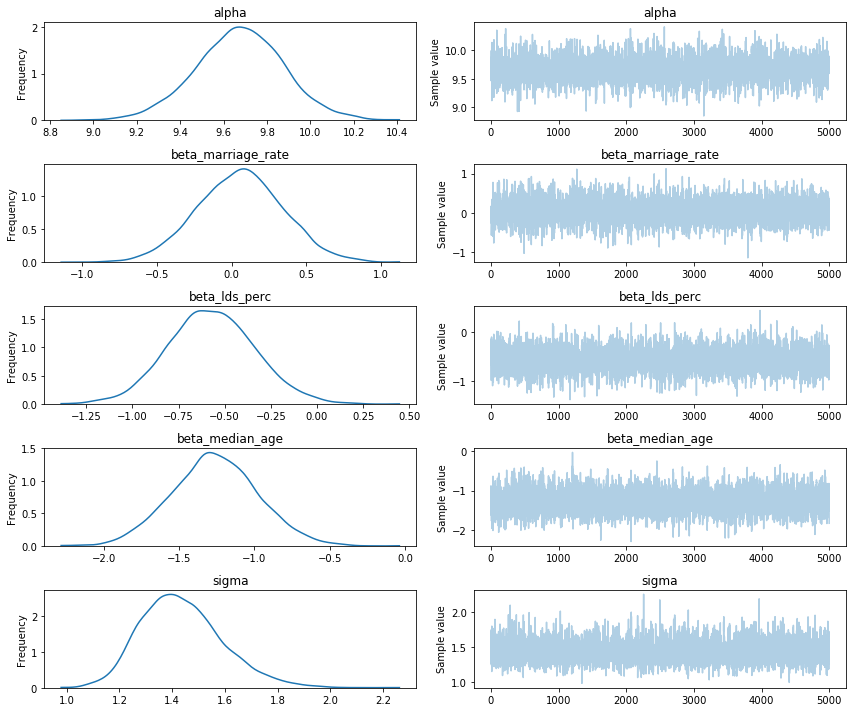

In [24]:
pm.traceplot(trace_5m4)

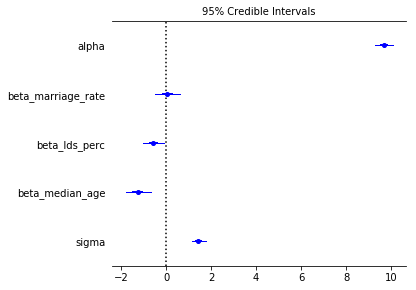

In [25]:
pm.forestplot(trace_5m4)

In [26]:
trace_5m4.varnames

['sigma_interval__',
 'alpha',
 'beta_marriage_rate',
 'beta_lds_perc',
 'beta_median_age',
 'sigma']

In [27]:
trace_5m4['alpha'].shape

(5000,)

df_5m4

In [28]:
def sim_posterior_5m4(row):
    return np.random.normal(trace_5m4['alpha'] + \
    trace_5m4['beta_marriage_rate'] * row['marriage_standardized'] + \
    trace_5m4['beta_median_age'] * row['median_age_marriage_standardized'] + \
    trace_5m4['beta_lds_perc'] * row['lds_perc_standardized'], np.random.uniform(0,5, 5000),)

In [29]:
for i, row in df_5m4.iterrows():
    samples = sim_posterior_5m4(row)
    print(pm.stats.hpd(samples, 0.05))

[  4.29654349  16.84724579]
[  4.38590404  16.74187325]
[  3.47813194  15.72708058]
[  5.54183522  17.84928477]
[  3.13644591  15.75962007]
[  4.01159676  16.718229  ]
[  2.35190567  14.11545433]
[  3.17713228  15.56114745]
[ -0.34393931  12.56987068]
[  2.897043   15.7953033]
[  4.15958093  16.68555065]
[  2.44387459  15.06334961]
[  5.22404036  17.7307769 ]
[  2.42675796  14.79549829]
[  3.70521823  15.90430503]
[  4.49207244  16.85048775]
[  4.20466677  17.07173357]
[  5.10488756  17.29751781]
[  3.9535899   16.24196711]
[  2.71562866  15.49007575]
[  1.8694544   14.53220889]
[  1.25277219  13.81485105]
[  3.06970861  15.41598381]
[  3.39879502  16.0882803 ]
[  4.01070822  17.03052532]
[  3.98311078  16.74335925]
[  4.23017149  16.43970785]
[  4.23179756  16.9208899 ]
[  2.11513261  14.91601574]
[  1.97001121  14.32213486]
[  3.74997568  16.14407361]
[  1.31101329  14.09393531]
[  3.39004388  15.99952714]
[  4.40202543  16.98511693]
[  3.21617112  15.69901099]
[  5.61832253  18.0180

## 5M5

One way to reason through multiple causation hypotheses is to imagine detailed mechanisms through which predictor variables may influence outcomes. For example, it is sometimes argued that the price of gasoline (predictor variable) is positively associated with lower obesity rates (outcome variable). However, there are at least two important mechanisms by which the price of gas could reduce obesity. First, it could lead to less driving and more exercise. Second, it could lead to less driving, which leads to less eating out, which leads to less consumption of huge restuarant meals. Can you outline one or more multiple regressions that address these two mechanisms? Assume you can have any predictor data you need.

### 5M5

First I would establish that gas prices and driving are negatively correlated. I would make a regression where the only predictor is gas prices and the independent variable is driving rate:
    
    gas prices, etc. -> driving rate

Next I would see how much the effect of driving is on other variables:

    driving rate, location, etc. -> exercise
    driving rate, location, etc. -> eating out

Then I would establish which of the "parents" of obesity can explain its variance:

    location, age, exercise, eating out -> obesity

If it turns out that "eating out" has a bigger effect on obesity than "exercise," and it also turns out that driving as a predictor predicts "eating out" well, then we could believe the `gas_prices -> eating out -> obesity` more, etc.

## Hard

All three exercises below use the same data, `data(foxes)` (part of `rethinking`). The urban fox (_Vulpes vulpes_) is a successful exploiter of human habitat. Since urban foxes move in packs and defend territories, data on habitat quality and population density is also included. The data frame has five columns:

(1) `group`: Number of the social group the individual fox belongs to
    
(2) `avgfood`: The average amount of food available in the territory

(3) `groupsize`: The number of foxes in the social group

(4) `area`: Size of the territory

(5) `weight`: Body weight of the individual fox

## 5H1 

Fit two bivariate Gaussian regressions, using `map`: (1) body weight as a linear function of territory size (`area`), and (2) body weight as a linear function of `groupsize`. Plot the results of these regressions, displaying the MAP regression line and the 95% interval of the mean. Is either variable important for predicting fox body weight?

### Ans

In [30]:
foxes_df = pd.read_csv('./Data/foxes.csv', sep=';');
foxes_df

,group,avgfood,groupsize,area,weight
0,1,0.37,2,1.09,5.02
1,1,0.37,2,1.09,2.84
2,2,0.53,2,2.05,5.33
3,2,0.53,2,2.05,6.07
4,3,0.49,2,2.12,5.85
5,3,0.49,2,2.12,3.25
6,4,0.45,2,1.29,4.53
7,4,0.45,2,1.29,4.09
8,5,0.74,3,3.78,6.13
9,5,0.74,3,3.78,5.59


In [54]:
foxes_df['area.std'] = (foxes_df['area'] - foxes_df['area'].mean()) / foxes_df['area'].std()
foxes_df['groupsize.std'] = (foxes_df['groupsize'] - foxes_df['groupsize'].mean()) / foxes_df['groupsize'].std()
foxes_df['weight.std'] = (foxes_df['weight'] - foxes_df['weight'].mean()) / foxes_df['weight'].std()
foxes_df['avgfood.std'] = (foxes_df['avgfood'] - foxes_df['avgfood'].mean()) / foxes_df['avgfood'].std()
foxes_df

,group,avgfood,groupsize,area,weight,area.std,groupsize.std,weight.std,avgfood.std
0,1,0.37,2,1.09,5.02,-2.239596,-1.524089,0.414135,-1.924829
1,1,0.37,2,1.09,2.84,-2.239596,-1.524089,-1.427046,-1.924829
2,2,0.53,2,2.05,5.33,-1.205508,-1.524089,0.675954,-1.118035
3,2,0.53,2,2.05,6.07,-1.205508,-1.524089,1.300942,-1.118035
4,3,0.49,2,2.12,5.85,-1.130106,-1.524089,1.115135,-1.319734
5,3,0.49,2,2.12,3.25,-1.130106,-1.524089,-1.080769,-1.319734
6,4,0.45,2,1.29,4.53,-2.024161,-1.524089,0.000291,-1.521432
7,4,0.45,2,1.29,4.09,-2.024161,-1.524089,-0.371323,-1.521432
8,5,0.74,3,3.78,6.13,0.658006,-0.874110,1.351617,-0.059119
9,5,0.74,3,3.78,5.59,0.658006,-0.874110,0.895544,-0.059119


In [32]:
with pm.Model() as area_vs_weight_model:
    alpha = pm.Normal('alpha', 0, 2)
    beta_area = pm.Normal('beta_area', 0, 2)
    mu = pm.Deterministic('mu', alpha + beta_area * foxes_df['area.std'])
    sigma = pm.Uniform('sigma', 0, 5)
    
    weight_hat = pm.Normal('weight_hat', mu, sigma, observed=foxes_df['weight.std'])
    traces_area_vs_weight_model = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [00:01<00:00, 1377.25it/s]


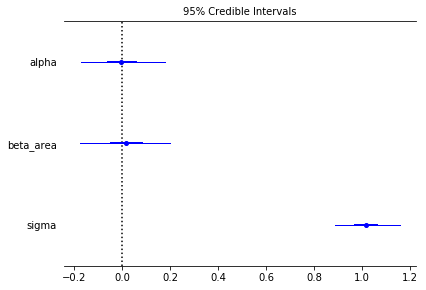

In [33]:
pm.forestplot(traces_area_vs_weight_model, ['alpha', 'beta_area', 'sigma'])

In [34]:
pm.find_MAP(model=area_vs_weight_model)

logp = -226.92, ||grad|| = 48.801: 100%|██████████| 11/11 [00:00<00:00, 1106.52it/s]


{'alpha': array(-2.7376913138903784e-16),
 'beta_area': array(0.01943551358693633),
 'mu': array([-0.0435277 , -0.0435277 , -0.02342966, -0.02342966, -0.02196418,
        -0.02196418, -0.03934061, -0.03934061,  0.01278868,  0.01278868,
         0.01278868, -0.01945193, -0.01945193, -0.01945193, -0.00877484,
        -0.00877484, -0.00877484, -0.02698869, -0.02698869, -0.02698869,
         0.01257932,  0.01257932,  0.01257932, -0.03012901, -0.03012901,
        -0.03012901, -0.02007999, -0.02007999, -0.02007999,  0.0140448 ,
         0.0140448 ,  0.0140448 ,  0.0140448 ,  0.0140448 ,  0.0140448 ,
         0.0140448 , -0.00312227, -0.00312227, -0.00312227, -0.00312227,
         0.00546127,  0.00546127,  0.00546127,  0.00546127, -0.01086839,
        -0.01086839, -0.01086839, -0.01086839,  0.00776417,  0.00776417,
         0.00776417,  0.00776417, -0.01505548, -0.01505548, -0.01505548,
        -0.01505548,  0.03979542,  0.03979542,  0.03979542,  0.03979542,
         0.03979542,  0.03979542, 

`area` by itself is not a good predictor of body weight.

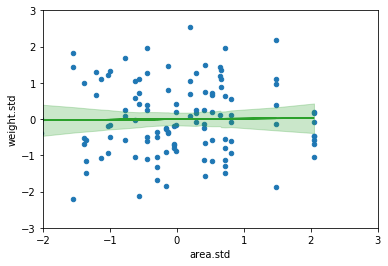

In [35]:
mu_hpd = pm.hpd(traces_area_vs_weight_model['mu'])
foxes_df.plot('area.std', 'weight.std', kind='scatter', xlim = (-2, 3), ylim = (-3, 3))
idx = np.argsort(foxes_df['area.std'])
plt.plot(foxes_df['area.std'], traces_area_vs_weight_model['mu'].mean(0), 'C2')
plt.fill_between(foxes_df['area.std'][idx], mu_hpd[:,0][idx], mu_hpd[:,1][idx],
                 color='C2', alpha=0.25);

In [36]:
varnames_groupsize_vs_weight = [
    'alpha',
    'beta_groupsize',
    'sigma'
]

In [37]:
with pm.Model() as groupsize_vs_weight_model:
    alpha = pm.Normal('alpha', 0, 2)
    beta_groupsize = pm.Normal('beta_groupsize', 0, 2)
    mu = pm.Deterministic('mu', alpha + beta_groupsize * foxes_df['groupsize.std'])
    sigma = pm.Uniform('sigma', 0, 5)
    
    weight_hat = pm.Normal('weight_hat', mu, sigma, observed=foxes_df['weight.std'])
    traces_groupsize_vs_weight_model = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [00:01<00:00, 1387.15it/s]


In [38]:
pm.find_MAP(model=groupsize_vs_weight_model)

logp = -167.41, ||grad|| = 3.4924e-05: 100%|██████████| 12/12 [00:00<00:00, 2027.05it/s]  


{'alpha': array(-3.523613948421248e-16),
 'beta_groupsize': array(-0.16065643246420092),
 'mu': array([ 0.24485467,  0.24485467,  0.24485467,  0.24485467,  0.24485467,
         0.24485467,  0.24485467,  0.24485467,  0.14043135,  0.14043135,
         0.14043135,  0.14043135,  0.14043135,  0.14043135,  0.14043135,
         0.14043135,  0.14043135,  0.14043135,  0.14043135,  0.14043135,
         0.14043135,  0.14043135,  0.14043135,  0.14043135,  0.14043135,
         0.14043135,  0.14043135,  0.14043135,  0.14043135, -0.27726191,
        -0.27726191, -0.27726191, -0.27726191, -0.27726191, -0.27726191,
        -0.27726191,  0.03600804,  0.03600804,  0.03600804,  0.03600804,
         0.03600804,  0.03600804,  0.03600804,  0.03600804,  0.03600804,
         0.03600804,  0.03600804,  0.03600804,  0.03600804,  0.03600804,
         0.03600804,  0.03600804,  0.03600804,  0.03600804,  0.03600804,
         0.03600804, -0.38168522, -0.38168522, -0.38168522, -0.38168522,
        -0.38168522, -0.38168

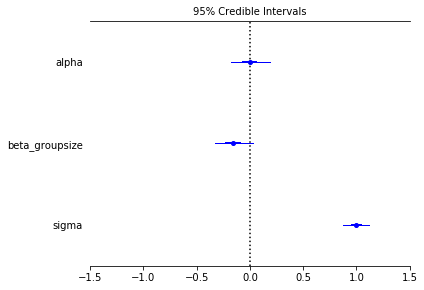

In [76]:
pm.forestplot(
    traces_groupsize_vs_weight_model, 
    varnames_groupsize_vs_weight,
    xlim=(-1.5,1.5)
)

In [40]:
foxes_df['groupsize.std'].shape

(116,)

In [41]:
traces_groupsize_vs_weight_model['mu'].shape

(1000, 116)

In [42]:
traces_groupsize_vs_weight_model['alpha'].shape

(1000,)

In [43]:
np.linspace(-3, 3, 1000)

array([-3.        , -2.99399399, -2.98798799, -2.98198198, -2.97597598,
       -2.96996997, -2.96396396, -2.95795796, -2.95195195, -2.94594595,
       -2.93993994, -2.93393393, -2.92792793, -2.92192192, -2.91591592,
       -2.90990991, -2.9039039 , -2.8978979 , -2.89189189, -2.88588589,
       -2.87987988, -2.87387387, -2.86786787, -2.86186186, -2.85585586,
       -2.84984985, -2.84384384, -2.83783784, -2.83183183, -2.82582583,
       -2.81981982, -2.81381381, -2.80780781, -2.8018018 , -2.7957958 ,
       -2.78978979, -2.78378378, -2.77777778, -2.77177177, -2.76576577,
       -2.75975976, -2.75375375, -2.74774775, -2.74174174, -2.73573574,
       -2.72972973, -2.72372372, -2.71771772, -2.71171171, -2.70570571,
       -2.6996997 , -2.69369369, -2.68768769, -2.68168168, -2.67567568,
       -2.66966967, -2.66366366, -2.65765766, -2.65165165, -2.64564565,
       -2.63963964, -2.63363363, -2.62762763, -2.62162162, -2.61561562,
       -2.60960961, -2.6036036 , -2.5975976 , -2.59159159, -2.58

`groupsize` mostly seems to be negatively correlated with `weight`. However, there seems to be a chance that the relationship between the two is zero.

In [44]:
pm.hpd(traces_groupsize_vs_weight_model['mu']).shape

(116, 2)

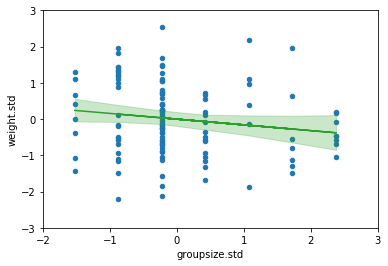

In [45]:
mu_hpd = pm.hpd(traces_groupsize_vs_weight_model['mu'])
foxes_df.plot('groupsize.std', 'weight.std', kind='scatter', xlim = (-2, 3), ylim = (-3, 3))
idx = np.argsort(foxes_df['groupsize.std'])
plt.plot(foxes_df['groupsize.std'], traces_groupsize_vs_weight_model['mu'].mean(0), 'C2')
plt.fill_between(foxes_df['groupsize.std'][idx], mu_hpd[:,0][idx], mu_hpd[:,1][idx],
                 color='C2', alpha=0.25);

## 5H2

Now fit a multiple linear regression with `weight` as the outcome and both `area` and `groupsize` as predictor variables. Plot the predictions of the model for each predictor, holding the other predictor constant at its mean. What does the model say about the importance of each variable? Why do you get different results than you got in the exercise just above?

In [46]:
with pm.Model() as groupsize_area_vs_weight_model:
    alpha = pm.Normal('alpha', 0, 2)
    beta_groupsize = pm.Normal('beta_groupsize', 0, 2)
    beta_area = pm.Normal('beta_area', 0, 2)
    mu = pm.Deterministic('mu', alpha + beta_groupsize * foxes_df['groupsize.std'] \
                          + beta_area * foxes_df['area.std'])
    sigma = pm.Uniform('sigma', 0, 5)
    
    weight_hat = pm.Normal('weight_hat', mu, sigma, observed=foxes_df['weight.std'])
    traces_groupsize_area_vs_weight_model = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:03<00:00, 803.27it/s]


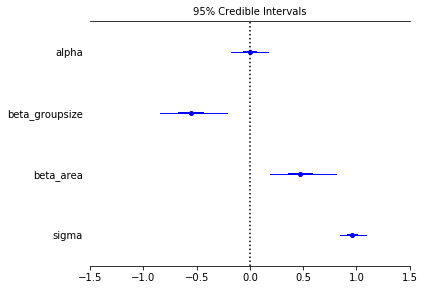

In [77]:
pm.forestplot(
    traces_groupsize_area_vs_weight_model, 
    varnames=['alpha', 'beta_groupsize', 'beta_area', 'sigma'],
    xlim=(-1.5,1.5)
)

In [48]:

num_samples = 2000
indep_samples = 1000
mu_groupsize_constant = np.zeros(shape=(indep_samples, num_samples))

for i, value in enumerate(np.linspace(-3,3,indep_samples)):
    mu_groupsize_constant[i,:] = \
        traces_groupsize_area_vs_weight_model['alpha'] + \
        traces_groupsize_area_vs_weight_model['beta_area'] * value + \
        traces_groupsize_area_vs_weight_model['beta_groupsize'].mean()
pm.hpd(mu_groupsize_constant)[:,0].shape

(2000,)

In [49]:

num_samples = 2000
indep_samples = 1000
mu_area_constant = np.zeros(shape=(indep_samples, num_samples))

for i, value in enumerate(np.linspace(-3,3,indep_samples)):
    mu_area_constant[i,:] = \
        traces_groupsize_area_vs_weight_model['alpha'] + \
        traces_groupsize_area_vs_weight_model['beta_groupsize'] * value + \
        traces_groupsize_area_vs_weight_model['beta_area'].mean()
pm.hpd(mu_area_constant)[:,0].shape

(2000,)

In [50]:
with pm.Model() as groupsize_vs_area_model:
    alpha = pm.Normal('alpha', 0, 2)
    beta_groupsize = pm.Normal('beta_groupsize', 0, 2)

    mu = pm.Deterministic('mu', alpha + beta_groupsize * foxes_df['groupsize.std'])
    sigma = pm.Uniform('sigma', 0, 5)
    
    area_hat = pm.Normal('area_hat', mu, sigma, observed=foxes_df['area.std'])
    traces_groupsize_vs_area = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:01<00:00, 1406.10it/s]


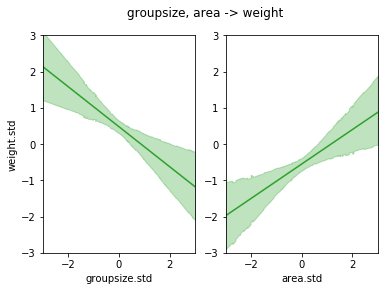

In [51]:
#mu_hpd = pm.hpd(traces_groupsize_area_vs_weight_model['mu'])
#foxes_df.plot('groupsize.std', 'weight.std', kind='scatter', xlim = (-2, 3), ylim = (-3, 3))

f, axarr = plt.subplots(1,2, sharex=True)
f.suptitle('groupsize, area -> weight')
axarr[0].plot(np.linspace(-3, 3, 1000), 
         np.linspace(-3, 3, 1000) * traces_groupsize_area_vs_weight_model['beta_groupsize'].mean() +
         traces_groupsize_area_vs_weight_model['beta_area'].mean() + 
         traces_groupsize_area_vs_weight_model['alpha'].mean(), 'C2')

axarr[0].set_xlim(xmin=-3, xmax=3)
axarr[0].set_ylim(ymin=-3, ymax=3)
axarr[0].set_xlabel('groupsize.std')
axarr[0].set_ylabel('weight.std')

axarr[0].fill_between(
    np.linspace(-3,3,1000),
    pm.hpd(mu_area_constant.T)[:,0],
    pm.hpd(mu_area_constant.T)[:,1],
    color='C2', alpha=0.3
)
#axarr[0].set_title('groupsize, area -> weight, keeping area at mean')

axarr[1].plot(np.linspace(-3, 3, 1000), 
         np.linspace(-3, 3, 1000) * traces_groupsize_area_vs_weight_model['beta_area'].mean() +
         traces_groupsize_area_vs_weight_model['beta_groupsize'].mean() + 
         traces_groupsize_area_vs_weight_model['alpha'].mean(), 'C2')



axarr[1].set_xlim(xmin=-3, xmax=3)
axarr[1].set_ylim(ymin=-3, ymax=3)
axarr[1].set_xlabel('area.std')

axarr[1].fill_between(
    np.linspace(-3,3,1000),
    pm.hpd(mu_groupsize_constant.T)[:,0],
    pm.hpd(mu_groupsize_constant.T)[:,1],
    color='C2', alpha=0.3
)

`groupsize` and `area` have larger effects when both are considered as predictors of `weight`. Both predictors are strongly correlated with each other, but one is positively correlated with the dependent variable, while the other is negatively correlated with the dependent variable. This is an example of a "Masked Relationship." The two predictors are strongly correlated with one another, making the credible intervals much bigger.

In [64]:
foxes_df[['groupsize', 'weight', 'area']].corr()

,groupsize,weight,area
groupsize,1.000000,-0.160994,0.827594
weight,-0.160994,1.000000,0.019477
area,0.827594,0.019477,1.000000


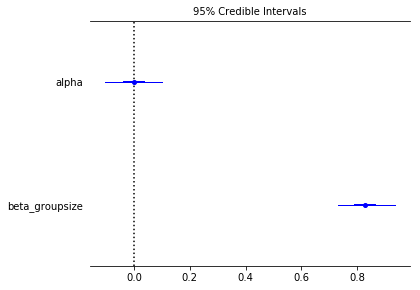

In [52]:
pm.forestplot(traces_groupsize_vs_area, varnames=['alpha', 'beta_groupsize'])

## 5H3

Finally, consider the `avgfood` variable. Fit two more multiple regressions: (1) body weight as an additive function of `avgfood` and `groupsize`, and (2) body weight as an additive function of all three variables, `avgfood` and `groupsize` and `area`. Compare the results of these models to the previous modes you've fit, in the first two exercises. (a) Is `avgfood` or `area` a better predictor of body weight? If you had to choose one or the other to include in a model, which would it be? Support your assessment with any tables or plots you choose. (b) When both `avgfood` or `area` are in the same model, their effects are reduced (closer to zero) and their standard errors are larger than when they are included in separate models. Can you explain this result?

The new ones seem to have big credible intervals because of multicollinearity. For (1), `avgfood` and `groupsize` are strongly positively correlated with each other. (2) is worse, since it has predictors from (1), but also has another variable that's highly correlated with `avgfood` and `groupsize`. I like the one of `groupsize` and `area` as predictors of `weight` -- even though each member of the pair has a strong correlation with the other, the correlation is weaker than that of `groupsize` and `avgfood`. Another nice thing is that it prevents masking the effect of `groupsize` on `weight`, given that we already know the effect of `area` on `weight`. I don't like the very first one because of the masked relationship, so I think the second option from earlier is best.

In [57]:
foxes_df

,group,avgfood,groupsize,area,weight,area.std,groupsize.std,weight.std,avgfood.std
0,1,0.37,2,1.09,5.02,-2.239596,-1.524089,0.414135,-1.924829
1,1,0.37,2,1.09,2.84,-2.239596,-1.524089,-1.427046,-1.924829
2,2,0.53,2,2.05,5.33,-1.205508,-1.524089,0.675954,-1.118035
3,2,0.53,2,2.05,6.07,-1.205508,-1.524089,1.300942,-1.118035
4,3,0.49,2,2.12,5.85,-1.130106,-1.524089,1.115135,-1.319734
5,3,0.49,2,2.12,3.25,-1.130106,-1.524089,-1.080769,-1.319734
6,4,0.45,2,1.29,4.53,-2.024161,-1.524089,0.000291,-1.521432
7,4,0.45,2,1.29,4.09,-2.024161,-1.524089,-0.371323,-1.521432
8,5,0.74,3,3.78,6.13,0.658006,-0.874110,1.351617,-0.059119
9,5,0.74,3,3.78,5.59,0.658006,-0.874110,0.895544,-0.059119


In [65]:
with pm.Model() as avgfood_groupsize_vs_bodyweight_model:
    alpha = pm.Normal('alpha', 0, 1)
    beta_avgfood = pm.Normal('beta_avgfood', 0, 1)
    beta_groupsize = pm.Normal('beta_groupsize', 0, 1)
    
    mu = pm.Deterministic('mu',
        alpha + beta_avgfood * foxes_df['avgfood.std'] + \
            beta_groupsize * foxes_df['groupsize.std']
    )
    
    sigma = pm.Uniform('sigma', 0,5)
    
    weight_hat = pm.Normal('weight_hat', mu, sigma, observed=foxes_df['weight.std'])
    avgfood_groupsize_vs_bodyweight_traces = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:03<00:00, 713.72it/s]


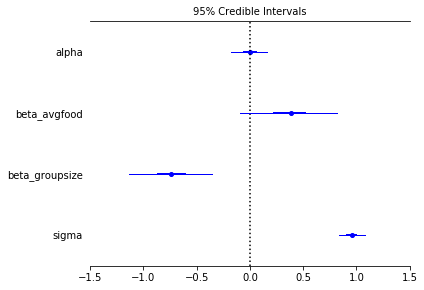

In [78]:
pm.forestplot(
    avgfood_groupsize_vs_bodyweight_traces, 
    varnames=['alpha','beta_avgfood', 'beta_groupsize', 'sigma'],
    xlim=(-1.5,1.5)
)

In [73]:
with pm.Model() as avgfood_groupsize_area_vs_bodyweight_model:
    alpha = pm.Normal('alpha', 0, 1)
    beta_avgfood = pm.Normal('beta_avgfood', 0, 1)
    beta_groupsize = pm.Normal('beta_groupsize', 0, 1)
    beta_area = pm.Normal('beta_area', 0, 1)
    
    mu = pm.Deterministic('mu',
        alpha + beta_avgfood * foxes_df['avgfood.std'] + \
            beta_groupsize * foxes_df['groupsize.std'] + \
            beta_area * foxes_df['area.std']
    )
    
    sigma = pm.Uniform('sigma', 0,5)
    
    weight_hat = pm.Normal('weight_hat', mu, sigma, observed=foxes_df['weight.std'])
    avgfood_groupsize_area_vs_bodyweight_traces = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:05<00:00, 480.85it/s]


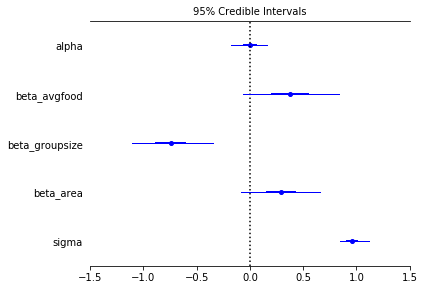

In [79]:
pm.forestplot(
    avgfood_groupsize_area_vs_bodyweight_traces, 
    varnames=['alpha','beta_avgfood', 'beta_groupsize', 'beta_area', 'sigma'],
    xlim=(-1.5,1.5)
)

In [63]:
foxes_df[['groupsize', 'weight', 'avgfood', 'area']].corr()

,groupsize,weight,avgfood,area
groupsize,1.000000,-0.160994,0.901483,0.827594
weight,-0.160994,1.000000,-0.025039,0.019477
avgfood,0.901483,-0.025039,1.000000,0.883104
area,0.827594,0.019477,0.883104,1.000000
